In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\nirma\Downloads\Salary_Data (3).csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df["YearsExperience"].isnull().sum()

0

In [7]:
import seaborn as sns

C:\Users\nirma\AppData\Local\Temp\ipykernel_11952\1382351491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["YearsExperience"])
c:\Users\nirma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearsExperience', ylabel='Density'>

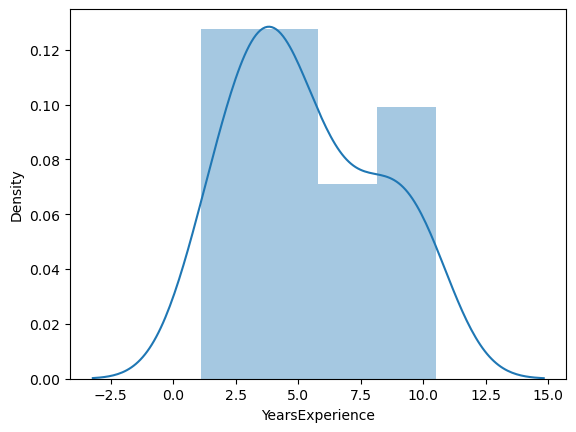

In [8]:
sns.distplot(df["YearsExperience"])

C:\Users\nirma\AppData\Local\Temp\ipykernel_11952\738670369.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Salary"])
c:\Users\nirma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Salary', ylabel='Density'>

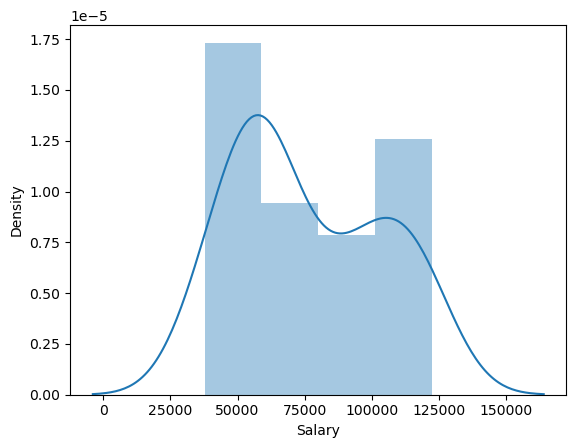

In [9]:
sns.distplot(df["Salary"])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x=df.iloc[:,:-1]

In [12]:
y=df.iloc[:,-1]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [18]:
x_train.shape

(22, 1)

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dt=DecisionTreeRegressor(max_depth=3,max_leaf_nodes=4,min_samples_split=3)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, max_leaf_nodes=4, min_samples_split=3)

In [95]:
y_pred=dt.predict(x_test)

In [96]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [97]:
import numpy as np

In [98]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(y_test,y_pred)

In [99]:
f" The performance of model is mse:{mse},mae:{mae} and r2_score:{r2}"

' The performance of model is mse:20864369.421296302,mae:4086.5138888888887 and r2_score:0.9794417566919503'

In [100]:
import pickle
with open('decisiontree.pkl','wb') as z:
     pickle.dump(dt,z)

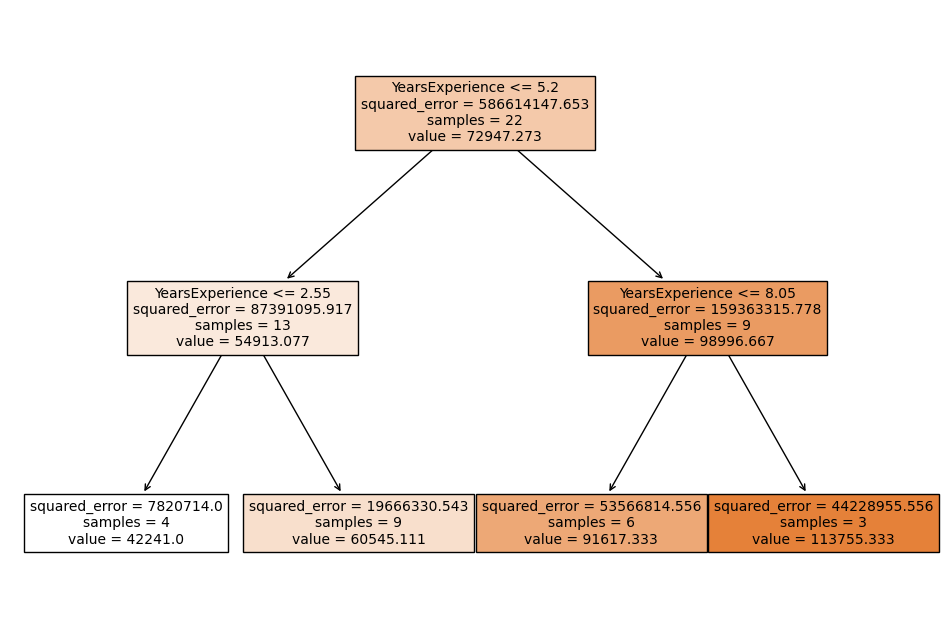

In [101]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt,filled=True,feature_names=x.columns,fontsize=10)
plt.show()